In [1]:
import struct
import os
import sys

In [2]:
f = open("SN00002.VIP","rb")

data = f.read(0x20)

In [3]:
viphead, w ,h,nose= struct.unpack("<8p2h20p",data)

In [4]:
list(viphead), w ,h,list(nose)

([73, 80, 48, 49, 49, 205, 100], 228, 140, [])

In [5]:
print(data)

b'VIP011\xcdd\xe4\x00\x8c\x00\x00\x00\x00\x00}\x000\xea\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'


In [6]:

img_size = w*h
print(w,h,img_size,hex(img_size))

228 140 31920 0x7cb0


In [7]:
def read_vip_frame_header(fd):
    buffer = fd.read(0x8)
    lenght,no_se1,no_se2,no_se3 = struct.unpack("<4h",buffer)
    return lenght,no_se1,no_se2,no_se3


def read_vip_frame_header_byte_arry(fd):
    buffer = fd.read(0x8)
    return struct.unpack("<8B",buffer)


In [8]:
def read_n_bytes(fd, lenght):
    buffer = fd.read(lenght)
    return struct.unpack(f"<{lenght}B",buffer)

In [9]:
def seek(fd,nbytes):
    fd.seek(nbytes,os.SEEK_CUR)

In [220]:
list_headers = []

#f.seek(0x20,0)
f.seek(0x0DF5B6A0,0)
with open("testaudio.raw","wb") as fda:
    while True:
        buffer = f.read(0x8)
        if not buffer:
            break
        header = struct.unpack("<8B",buffer)
        size,kind,_,_ = struct.unpack("<4H",buffer)
        list_headers.append(header)
        #print(hex(size))
        if kind==0x0700:
            audio = f.read(size)
            fda.write(audio)
        else:
            seek(f,size)
        if len(list_headers)>10000:
            break
        

In [231]:
if False:
    for count,bh in  enumerate(list_headers):
        h=bh[0]
        endset = "💩💩💩💩💩💩💩💩💩💩💩"
        size=h[1]*0xff+h[0]
        print(f"{count:06}: [{size:>6}]",end=" ")
        for i,b in enumerate(h):
            print(f"{b:02x}" ,end=" ")
            if i==3:
                if b==4:
                    endset = "🗝️"
                elif b==7:
                    endset = "🎵"
                elif b==2 :
                    endset = "🎨"
                elif b==5:
                    endset = "🎬"

        print(f"{endset}")

In [232]:
list_headers = []

#f.seek(0x20,0)
#f.seek(0x0DF5B6A0,0)
f.seek(0x0135a684,0)

while True:
    
    buffer = f.read(0x8)
    if not buffer:
        break
    header = struct.unpack("<8B",buffer)
    size,kind,_,_ = struct.unpack("<4H",buffer)
    datos = f.read(size)
    list_headers.append((header,datos))
    #print(hex(size))
    if len(list_headers)>1000:
        break

In [233]:
if True:
    for count,bh in  enumerate(list_headers):
        h=bh[0]
        endset = "💩💩💩💩💩💩💩💩💩💩💩"
        size=h[1]*0xff+h[0]
        print(f"{count:06}: [{size:>6}]",end=" ")
        for i,b in enumerate(h):
            print(f"{b:02x}" ,end=" ")
            if i==3:
                if b==4:
                    endset = "🗝️"
                elif b==7:
                    endset = "🎵"
                elif b==2 :
                    endset = "🎨"
                elif b==5:
                    endset = "🎬"

        print(f"{endset}")

000000: [   440] b9 01 00 07 10 10 60 c0 🎵
000001: [   440] b9 01 00 07 11 10 60 c0 🎵
000002: [ 11925] c3 2e 02 0b 12 10 60 c0 💩💩💩💩💩💩💩💩💩💩💩
000003: [   440] b9 01 00 07 12 10 60 c0 🎵
000004: [   440] b9 01 00 07 13 10 60 c0 🎵
000005: [ 11925] c3 2e 02 0b 14 10 60 c0 💩💩💩💩💩💩💩💩💩💩💩
000006: [   440] b9 01 00 07 14 10 60 c0 🎵
000007: [   440] b9 01 00 07 15 10 60 c0 🎵
000008: [ 11925] c3 2e 02 0b 16 10 60 c0 💩💩💩💩💩💩💩💩💩💩💩
000009: [   440] b9 01 00 07 16 10 60 c0 🎵
000010: [   440] b9 01 00 07 17 10 60 c0 🎵
000011: [ 11925] c3 2e 02 0b 18 10 60 c0 💩💩💩💩💩💩💩💩💩💩💩
000012: [   440] b9 01 00 07 18 10 60 c0 🎵
000013: [   440] b9 01 00 07 19 10 60 c0 🎵
000014: [ 11925] c3 2e 02 0b 1a 10 60 c0 💩💩💩💩💩💩💩💩💩💩💩
000015: [   440] b9 01 00 07 1a 10 60 c0 🎵
000016: [   440] b9 01 00 07 1b 10 60 c0 🎵
000017: [ 11925] c3 2e 02 0b 1c 10 60 c0 💩💩💩💩💩💩💩💩💩💩💩
000018: [   440] b9 01 00 07 1c 10 60 c0 🎵
000019: [   440] b9 01 00 07 1d 10 60 c0 🎵
000020: [ 11925] c3 2e 02 0b 1e 10 60 c0 💩💩💩💩💩💩💩💩💩💩💩
000021: [   440] b9 01 00 0

In [72]:
count = 0
for i in buffer_pixels:
    if i%1 == 0:
        count += i
        
print(count)

3385


In [160]:
def read_paleta_from_chunk(chunk):
    pal = []
    pal.append((0,0,0))
    i=1
    while True:
        try:
            r,g,b = chunk[i:i+3] # leemos RGB
            i+=3
            pal.append( (r,g,b))
        except Exception as e:
            print(f"XXXX:{e}")
            break
    return pal

In [215]:
np.array([int(x) for x in buffer_pixels if x!=1],dtype="uint8").sum()

67480

In [ ]:
f.close()

In [151]:
import numpy as np
from pprint import pprint

In [238]:
nframe=332
buffer_pixels = list_headers[nframe][1]
print(list_headers[nframe][0])
tmp_data = np.array([int(x) for x in buffer_pixels],dtype="uint8")
pprint(tmp_data[:100])

(131, 112, 2, 4, 234, 16, 96, 192)
array([129,  33,   1,  15,  33, 133,  48,   1,  15,  48, 132,  15, 131,
        67, 137,  15,   0,  33, 129,  15, 130,  33,   1,  15,  25, 129,
        15,   0,  67, 129,  15, 130,  33,   5,  15,  33,  15,  33,  15,
        33, 129,  15,   0,  33, 134,  15,   1,  73,  15, 135,  33, 130,
        15,  10,  67,  25,  15,  67,  25,  33,  73,  33,  73,  15,  25,
       134,  15, 133,  33,   2,  15,  33,  73, 129,  15,   4,  33,  48,
        69,  33, 160, 132,  48,   1,  69,  48, 129, 125,   3,  48, 179,
        48,   9, 130,  40,   2, 125,  69,  40, 131], dtype=uint8)


In [243]:
len(tmp_data)*3

86409

In [234]:
nframe=331
buffer_pixels = list_headers[nframe][1]
print(list_headers[nframe][0])
tmp_data = np.array([int(x) for x in buffer_pixels],dtype="uint8")
pprint(tmp_data[:100])

(68, 2, 0, 2, 234, 16, 96, 192)
array([  1, 192,   2,   2,   2,  34,  14,  10,  38,  32,  30,  38,  34,
        32,  48,  38,  32,  48,  48,  34,  48,  46,  48,  48,  40,  32,
        48,  40,  40,  30,  32,  26,  30,  26,  32,  18,   6,   4,  36,
        30,  32,  48,  14,  10,  48,  44,  40,  34,  16,   6,  32,  18,
        16,  42,  22,  18,  48,  44,  32,  14,  16,  14,  14,  12,  16,
         8,   6,   6,  48,  44,  44,  22,  16,   6,  48,  46,  40,  48,
        48,  48,  48,  32,  22,  34,  24,  18,  18,  16,  16,   6,   8,
         6,   6,   6,   8,   4,   2,   2,  48,  44], dtype=uint8)


In [235]:
paleta = read_paleta_from_chunk(tmp_data)
len(paleta)

XXXX:not enough values to unpack (expected 3, got 0)


194

In [236]:
import matplotlib.pyplot as plt

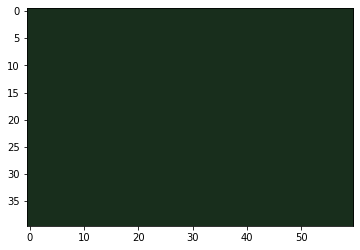

In [246]:
pal =  np.array( paleta ,dtype="uint8") 
indices = np.ones((40,60),dtype="uint8") * 192
plt.imshow(pal[indices] )

In [248]:
pal[33]

array([ 2, 48, 44], dtype=uint8)

#no va:
- FINALPAL

In [ ]:
with open("FILES/TRAN_PAL.PPS","rb") as f:
    header = f.read(2)
    pal = []
    pal.append((0,0,0))
    while True:
        try:
            color = f.read(3) # leemos RGB
            if len(color)==0:
                break
            color_rgb = struct.unpack("<3B",color)
            pal.append(color_rgb)
        except Exception as e:
            print(len(color),e)
            break
        


In [277]:
nframe=332
buffer_pixels = list_headers[nframe][1]
print(list_headers[nframe][0])
tmp_data = np.array([int(x) for x in buffer_pixels],dtype="uint8")
pprint(tmp_data )

(131, 112, 2, 4, 234, 16, 96, 192)
array([129,  33,   1, ...,  40,   0, 120], dtype=uint8)


In [271]:
new_buffer =[]
for i  in range(len(tmp_data)):
    nrep = tmp_data[i]
    i+=1
    try:
        new_buffer += list(pal[tmp_data[i]]) * nrep
    except Exception as e:
        print( i )
        pass

28803


In [254]:
new_img = np.array(new_buffer,dtype="uint8")


In [262]:
(new_img.shape[0]/3)


2463906.0

In [ ]:
new_img=new_img.reshape((int(h),int(w),3))

In [275]:
len(tmp_data)

28803

In [ ]:
plt.imshow(new_img  )

In [ ]:
plt.imsave("train.png",new_img)

In [ ]:
new_buffer[:19]

In [ ]:
16000